# Metrik Statistik Penting pada Algoritma Clustering K-Means

## Membaca Dataset

In [23]:
#Import library pandas
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')
print(data.head(10))

   customer_id  frequency  recency     monetary
0        12346          1       48  27904840000
1        12347          2       40    423420000
2        12348          2       41    414092000
3        12350          1       33    119478000
4        12352          3        6    449984000
5        12356          1       48    809968000
6        12359          2       28    842749000
7        12361          1       10     67602000
8        12362          1       18    170512000
9        12365          2       14    226652000


## Melihat Dimensi Dataframe

In [24]:
print(data.shape)

(1625, 4)


## Melihat Tipe Data Dari Setiap Kolom

In [25]:
print(data.info)

<bound method DataFrame.info of       customer_id  frequency  recency     monetary
0           12346          1       48  27904840000
1           12347          2       40    423420000
2           12348          2       41    414092000
3           12350          1       33    119478000
4           12352          3        6    449984000
...           ...        ...      ...          ...
1620        18257          2       13    128876000
1621        18259          1       89    133128000
1622        18260          2       57    281751000
1623        18269          1       89     59960000
1624        18283          3        7    113591000

[1625 rows x 4 columns]>


## Melihat Statistik Dari Setiap Kolom

In [26]:
print(data.describe())

        customer_id    frequency      recency      monetary
count   1625.000000  1625.000000  1625.000000  1.625000e+03
mean   15261.415385     1.910769    36.455385  3.321584e+08
std     1745.556403     2.111145    26.934570  1.140958e+09
min    12346.000000     1.000000     1.000000  3.100000e+05
25%    13764.000000     1.000000    13.000000  7.520200e+07
50%    15221.000000     1.000000    32.000000  1.380670e+08
75%    16805.000000     2.000000    54.000000  2.902490e+08
max    18283.000000    34.000000    90.000000  2.790484e+10


## Melakukan Pengecekan Data Null

In [27]:
print(data.isnull().any().any())

False


## Membuang Kolom customer_id

In [28]:
#Menghapus kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)
print(RFM_km.head)

<bound method NDFrame.head of       frequency  recency     monetary
0             1       48  27904840000
1             2       40    423420000
2             2       41    414092000
3             1       33    119478000
4             3        6    449984000
...         ...      ...          ...
1620          2       13    128876000
1621          1       89    133128000
1622          2       57    281751000
1623          1       89     59960000
1624          3        7    113591000

[1625 rows x 3 columns]>


## Melihat Outliers pada Setiap Kolom

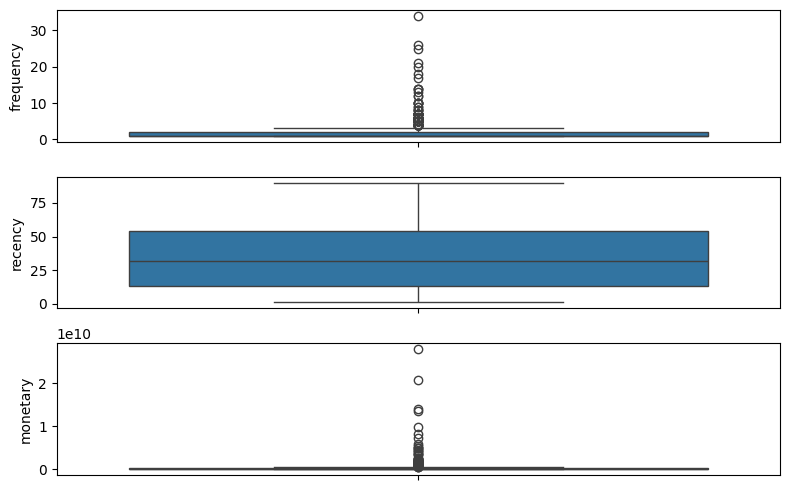

In [29]:
#Import library matplotlib.pyplot
import matplotlib.pyplot as plt

#Import library seaborn
import seaborn as sns

#Menampilkan boxplot data frequency, recency, dan monetary
fig, ax = plt.subplots(3, 1, figsize=(8,5))
sns.boxplot(RFM_km["frequency"], ax=ax[0])
sns.boxplot(RFM_km["recency"], ax=ax[1])
sns.boxplot(RFM_km["monetary"], ax=ax[2])
plt.tight_layout()
plt.show()

## Menggunakan RobustScaler()

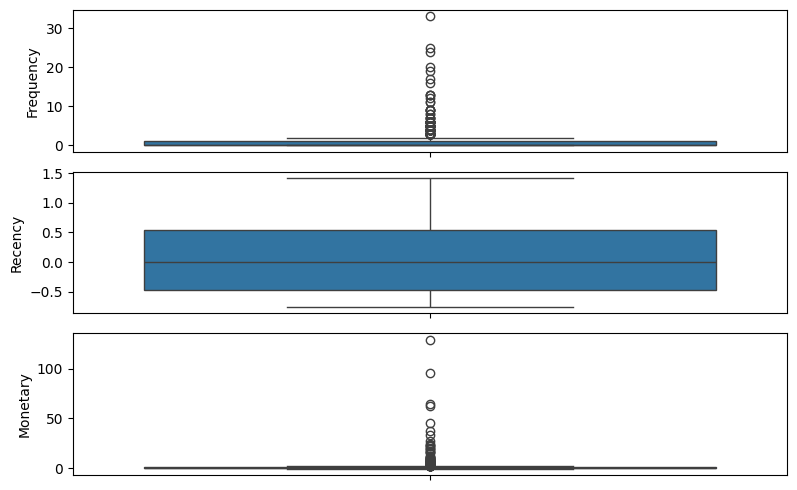

In [30]:
#Import library robust scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
RFM_robust = robust_scaler.fit_transform(RFM_km)
RFM_robust = pd.DataFrame(RFM_robust)
RFM_robust.columns = ["Frequency","Recency","Monetary"]

#Import library matplotlib.pyplot dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Menampilkan boxplot data frequency, recency, dan monetary
fig, ax = plt.subplots(3, 1, figsize=(8,5))
sns.boxplot(RFM_robust["Frequency"], ax=ax[0])
sns.boxplot(RFM_robust["Recency"], ax=ax[1])
sns.boxplot(RFM_robust["Monetary"], ax=ax[2])
plt.tight_layout()
plt.show()

## Implementasi Elbow Method

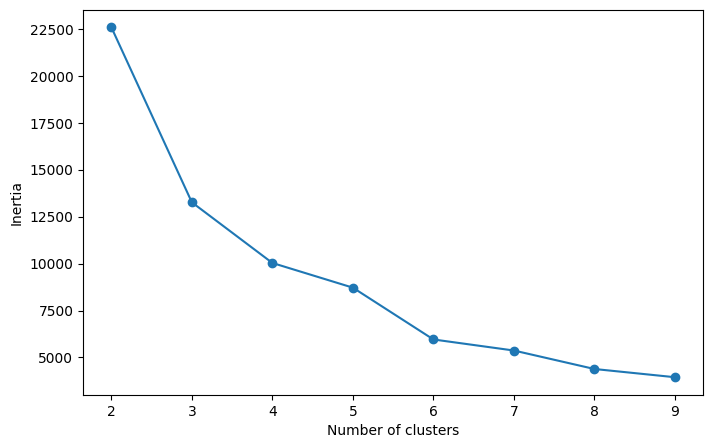

In [31]:
#Import library Kmeans
from sklearn.cluster import KMeans

#Membuat variable SSE untuk menampung nilai WSS dari setiap nilai k
SSE = []

#Melakukan k-means berulang dengan nilai k yang berbeda-beda dari 2 sampai 10
for k in range(2, 10):
    k_means = KMeans(n_clusters=k, random_state=0)
    model = k_means.fit(RFM_robust)
    SSE.append(k_means.inertia_)

#Mengkonversi hasil ke dalam data frame, kemudian menampilkannya dalam bentuk plot
import matplotlib.pyplot as plt
frame = pd.DataFrame({"Cluster":range(2,10), "SSE":SSE})
plt.figure(figsize=(8,5))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Memilih nilai k = 3 atau 4, untuk menganalisa hasil dari clustering-nya.


## Clustering K-Means dengan 3 Cluster

In [32]:
#Import library Kmeans
from sklearn.cluster import KMeans

#Menjalankan k-means dengan nilai k = 3
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(RFM_robust)

#pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

#Menggabungkan RFM dan hasil label clustering
RFM_labeled = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

#Menghitung jumlah data dari tiap cluster
print("Jumlah data dari tiap cluster:")
print(RFM_labeled["cluster"].value_counts())

Jumlah data dari tiap cluster:
cluster
0    1598
2      23
1       4
Name: count, dtype: int64


## Visualisasi Box Plot untuk 3 Cluster

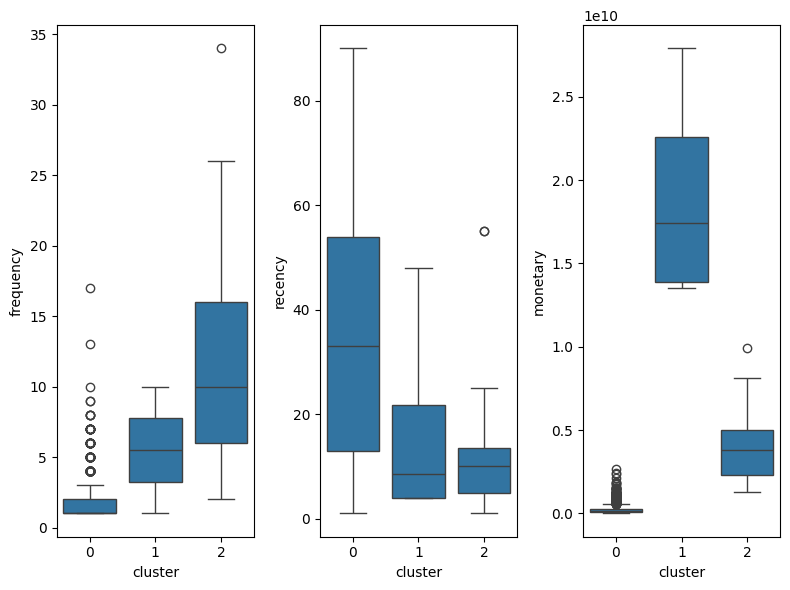

In [33]:
#Import library matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Menampilkan boxplot elbow method
fig, ax = plt.subplots(1, 3, figsize=(8,6))
sns.boxplot(x="cluster", y="frequency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="recency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_labeled, ax=ax[2])
plt.tight_layout()
plt.show()

“Cluster 1 total transaksinya rendah, sementara cluster 2 memiliki rentang monetary yang cukup besar dan nilai total transaksinya paling tinggi dibandingkan kedua cluster lainnya. Pada bagian recency, cluster 1 memiliki rentang yang sangat besar. Ketiga cluster ini sulit dibedakan pada bagian ini. Sementara pada bagian frekuensi transaksi, cluster 0 memiliki frekuensi transaksi lebih besar dibandingkan kedua cluster lainnya. Nilai frekuensi cluster 1 paling kecil, sehingga kita bisa menyimpulkan bahwa konsumen pada cluster 1 lebih jarang melakukan transaksi dibandingkan kedua cluster lainnya. Benar tidak pemahamanku?”

## Implementasi Silhouette Method

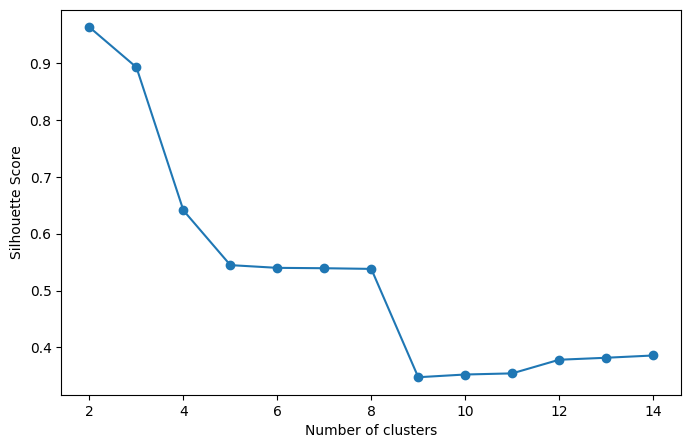

In [34]:
#Import KMeans & silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Melakukan k-means berkali-kali dengan nilai k yang berbeda-beda dari 2 sampai 15
silhouette = []
for k in range(2, 15):
    k_means = KMeans(n_clusters=k, random_state=0)
    model = k_means.fit(RFM_robust)
    silhouette.append(silhouette_score(RFM_robust, model.labels_))

#Import library matplotlib
import matplotlib.pyplot as plt

#Mengkonversi hasil ke dalam data frame, kemudian menampilkannya dalam bentuk plot
frame = pd.DataFrame({"Cluster":range(2,15), "Silhouette Score":silhouette})
plt.figure(figsize=(8,5))
plt.plot(frame["Cluster"], frame["Silhouette Score"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

## Clustering K-Means dengan 4 Cluster

In [35]:
#Menjalankan k-means dengan nilai k = 4
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(RFM_robust)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

#Menggabungkan dataframe data dan hasil label clustering
RFM_labeled = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

#Menghitung jumlah data dari tiap cluster
print("Jumlah data dari tiap cluster:")
print(RFM_labeled["cluster"].value_counts())

Jumlah data dari tiap cluster:
cluster
0    1402
3     200
2      19
1       4
Name: count, dtype: int64


## Visualisasi Box Plot untuk 4 Cluster

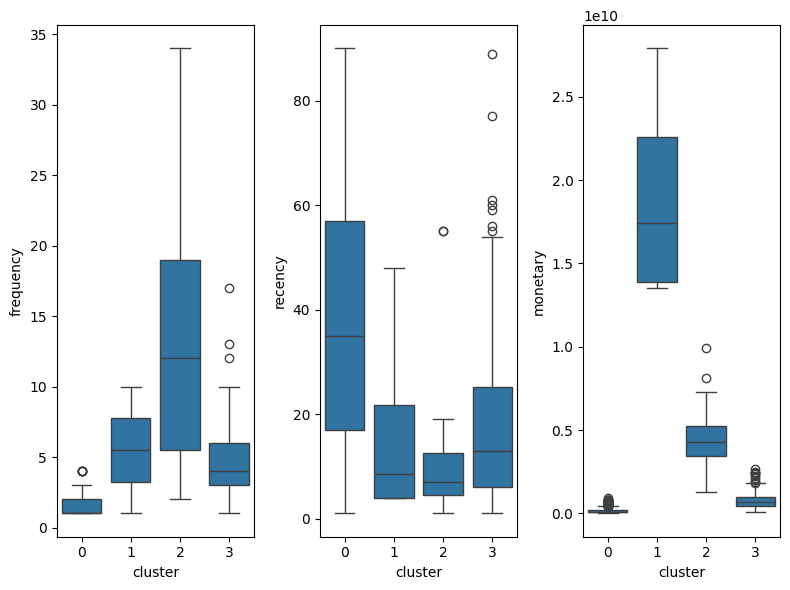

In [36]:
#Menampilkan boxplot silhouette method
fig, ax = plt.subplots(1, 3, figsize=(8,6))
sns.boxplot(x="cluster", y="frequency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="recency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_labeled, ax=ax[2])
plt.tight_layout()
plt.show()

Berdasarkan itu, aku melihat perbedaan yang jelas dari setiap cluster pada bagian monetary dari tiap cluster. Cluster 0 nilai monetary-nya sangat rendah, sementara cluster 1 memiliki nilai monetary tertinggi. Cluster 2 merupakan kelompok dengan frekuensi transaksi yang paling banyak dibandingkan dengan cluster lainnya.